## Inference

In [40]:
import torch
from torchvision import transforms 
from torch.functional import F 
from torch import nn
import matplotlib.pyplot as plt
from PIL import Image

# Define the autoencoder model
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
        )
        self.bottleneck = torch.nn.Sequential(
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
        )
        self.decoder = torch.nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 32, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=3, stride=2, padding=1, output_padding=1),
        )

    def forward(self, x) -> torch.Tensor:
        encoded = self.encoder(x)
        bottleneck = self.bottleneck(encoded)
        decoded = self.decoder(bottleneck)
        return decoded

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


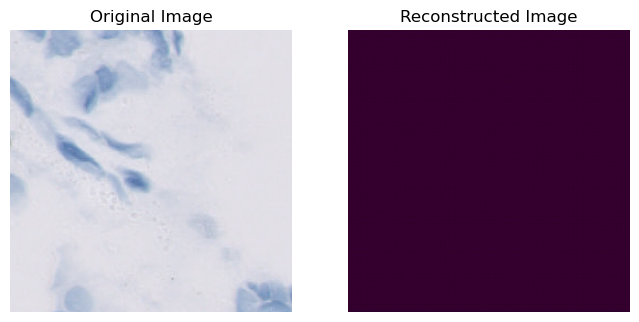

In [41]:
# Instantiate the model and set to eval mode
model = Autoencoder()
model.eval()

# Define a transform to preprocess the image
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to a fixed size for consistency
    transforms.ToTensor()
])

# Load and preprocess the image
image = Image.open("/Users/marino/Documents/GitHub/MED-GIA/MED-GIA/Anomaly Detection/0.png").convert("RGB")  # Convert to RGB to ensure 3 channels
input_image = transform(image).unsqueeze(0)  # Add batch dimension

# Perform a forward pass to get the reconstructed image
with torch.no_grad():
    reconstructed_image = model(input_image)

# Convert tensors to images for visualization
input_image_np = input_image.squeeze(0).permute(1, 2, 0).numpy()
reconstructed_image_np = reconstructed_image.squeeze(0).permute(1, 2, 0).numpy()

# Display the original and reconstructed images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(input_image_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Reconstructed Image")
plt.imshow(reconstructed_image_np)
plt.axis("off")

plt.show()